In [25]:
import sys
import sklearn
import os
import cv2
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam

In [26]:
# Define the dataset and data loaders
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'F:/Mahabub/dataset/Train',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123
)

Found 140002 files belonging to 2 classes.
Using 112002 files for training.


In [27]:
# Define the dataset and data loaders
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'F:/Mahabub/dataset/Test',
    batch_size=32,
    image_size=(224, 224),
)

Found 10905 files belonging to 2 classes.


In [28]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'F:/Mahabub/dataset/Validation',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 39428 files belonging to 2 classes.
Using 7885 files for validation.


In [29]:
# Function to plot sample images
def plot_images(dataset, class_names=2):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):
        for i in range(4):
            ax = plt.subplot(2, 2, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

In [30]:
# Define class names (assuming the directories in '/content/Train' represent the class names)
class_names = train_dataset.class_names

In [31]:
# Create dictionary to store class counts
class_counts = {
    'REAL': {
        'train': 1,
        'validation': 1
        'test': 1
    },
    'FAKE': {
        'train': 0,
        'validation': 0
        'test' : 0
    }
    
}

SyntaxError: invalid syntax (1820932939.py, line 6)

In [ ]:
# Count the classes in the datasets
for images, labels in train_dataset:
    class_counts['REAL']['train'] += np.sum(labels == 1)
    class_counts['FAKE']['train'] += np.sum(labels == 0)

In [ ]:
for images, labels in validation_dataset:
    class_counts['REAL']['validation'] += np.sum(labels == 1)
    class_counts['FAKE']['validation'] += np.sum(labels == 0)

In [ ]:
for images, labels in test_dataset:
    class_counts['REAL']['test'] += np.sum(labels == 1)
    class_counts['FAKE']['test'] += np.sum(labels == 0)

In [ ]:
# Plot the bar chart
labels = ['Train-REAL', 'Train-FAKE', 'Validation-REAL', 'Validation-FAKE','Test-REAL','Test-FAKE']
counts = [
    class_counts['REAL']['train'],
    class_counts['FAKE']['train'],
    class_counts['REAL']['validation'],
    class_counts['FAKE']['validation']
    class_counts['REAL']['test'],
    class_counts['FAKE']['test'],
]

In [ ]:
plt.bar(labels, counts, color=['#000F64', '#820406'])
plt.title('Count of classes in each set')
plt.xlabel('Set and Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot sample images from the training dataset
plot_images(train_dataset, class_names)
plt.suptitle('Sample Images from Training Dataset')
plt.show()

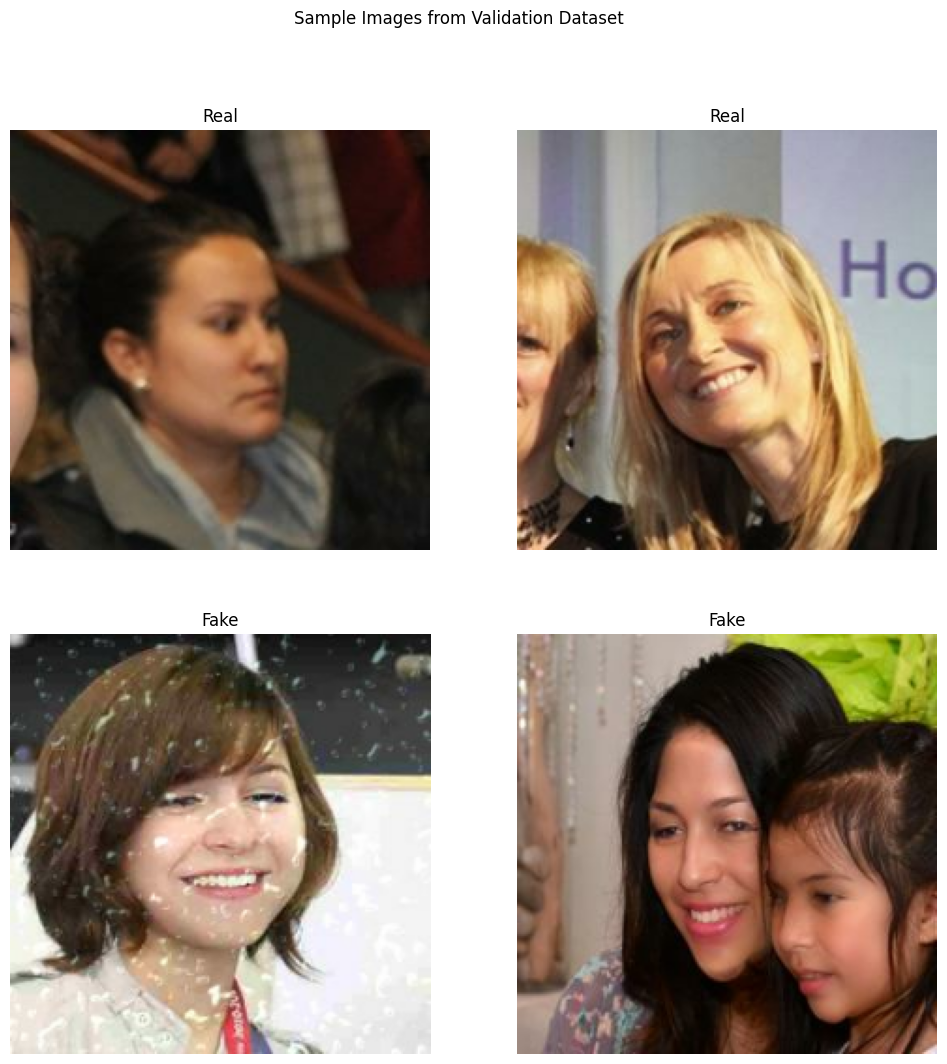

In [32]:
# Plot sample images from the validation dataset
plot_images(validation_dataset, class_names)
plt.suptitle('Sample Images from Validation Dataset')
plt.show()

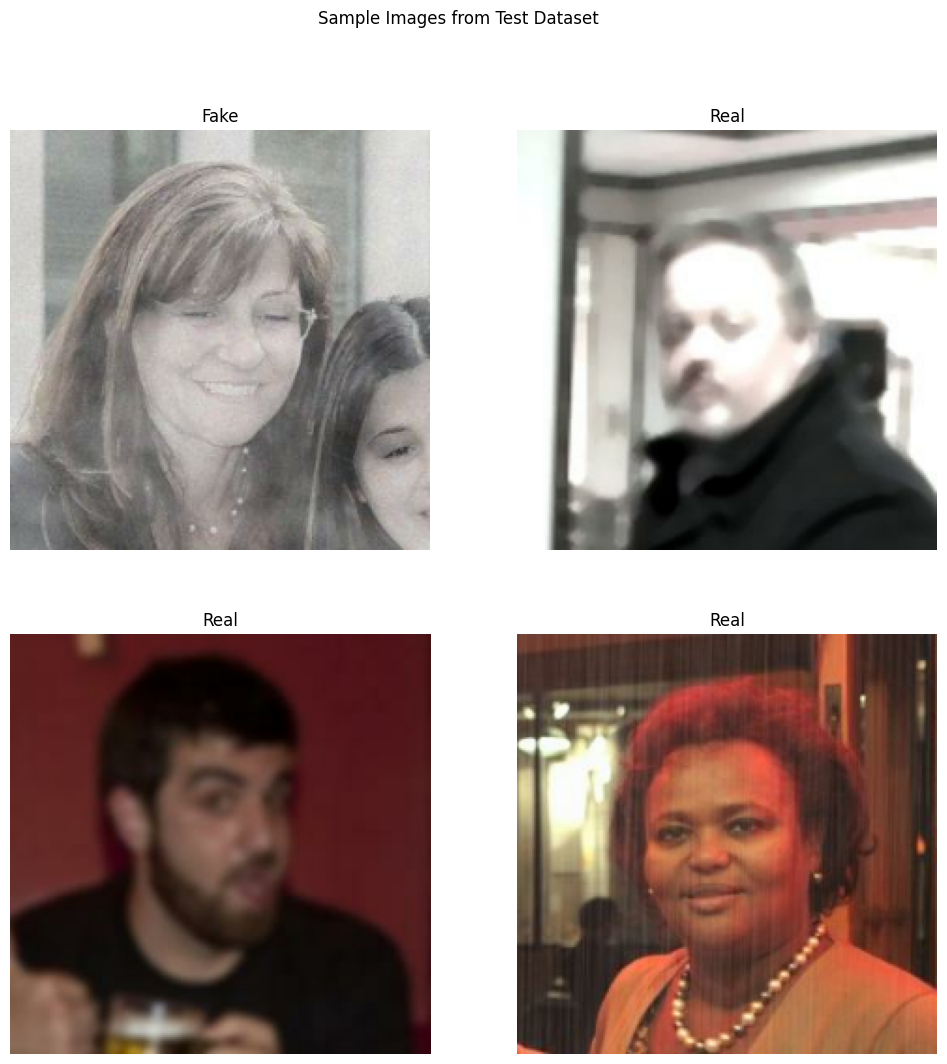

In [33]:
# Plot sample images from the test dataset
plot_images(test_dataset, class_names)
plt.suptitle('Sample Images from Test Dataset')
plt.show()

In [ ]:
!pip install tensorflow-GPU

In [34]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
def create_vit_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = EfficientNetB0(include_top=False, weights=None, input_tensor=input_tensor)
    base_model.load_weights('F:/Mahabub/efficientnetb0_notop.h5')  # Provide the path to your local file
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_tensor, outputs=output_tensor)
    return model


 


In [36]:
vit_model = create_vit_model()
vit_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']    

In [38]:
vit_model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])


In [39]:
# Train the models
num_epochs = 100

history=vit_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=num_epochs
)

Epoch 1/100
3501/3501 [==============================] - 684s 191ms/step - loss: 0.0741 - accuracy: 0.9718 - val_loss: 0.1022 - val_accuracy: 0.9595
Epoch 2/100
3501/3501 [==============================] - 573s 164ms/step - loss: 0.0464 - accuracy: 0.9820 - val_loss: 0.1217 - val_accuracy: 0.9542
Epoch 3/100
3501/3501 [==============================] - 572s 163ms/step - loss: 0.0394 - accuracy: 0.9847 - val_loss: 0.0880 - val_accuracy: 0.9670
Epoch 4/100
3501/3501 [==============================] - 589s 168ms/step - loss: 0.0330 - accuracy: 0.9868 - val_loss: 0.0960 - val_accuracy: 0.9707
Epoch 5/100
3501/3501 [==============================] - 609s 174ms/step - loss: 0.0281 - accuracy: 0.9885 - val_loss: 0.0690 - val_accuracy: 0.9726
Epoch 6/100
3501/3501 [==============================] - 617s 176ms/step - loss: 0.0241 - accuracy: 0.9902 - val_loss: 0.1100 - val_accuracy: 0.9581
Epoch 7/100
3501/3501 [==============================] - 613s 175ms/step - loss: 0.0223 - accuracy: 0.9910

In [40]:
test_loss1, test_acc1 = vit_model.evaluate(validation_dataset, verbose=1)
print('Validation Accuracy:', test_acc1)
print('Validation Loss:', test_loss1)

247/247 [==============================] - 7s 28ms/step - loss: 0.1081 - accuracy: 0.9768
Validation Accuracy: 0.9767913818359375
Validation Loss: 0.10806728154420853


In [41]:
test_loss2, test_acc2 = vit_model.evaluate(test_dataset, verbose=1)
print('Test Accuracy:', test_acc2)
print('Test Loss:', test_loss2)

341/341 [==============================] - 49s 144ms/step - loss: 0.4789 - accuracy: 0.9132
Test Accuracy: 0.9131590723991394
Test Loss: 0.4788917303085327


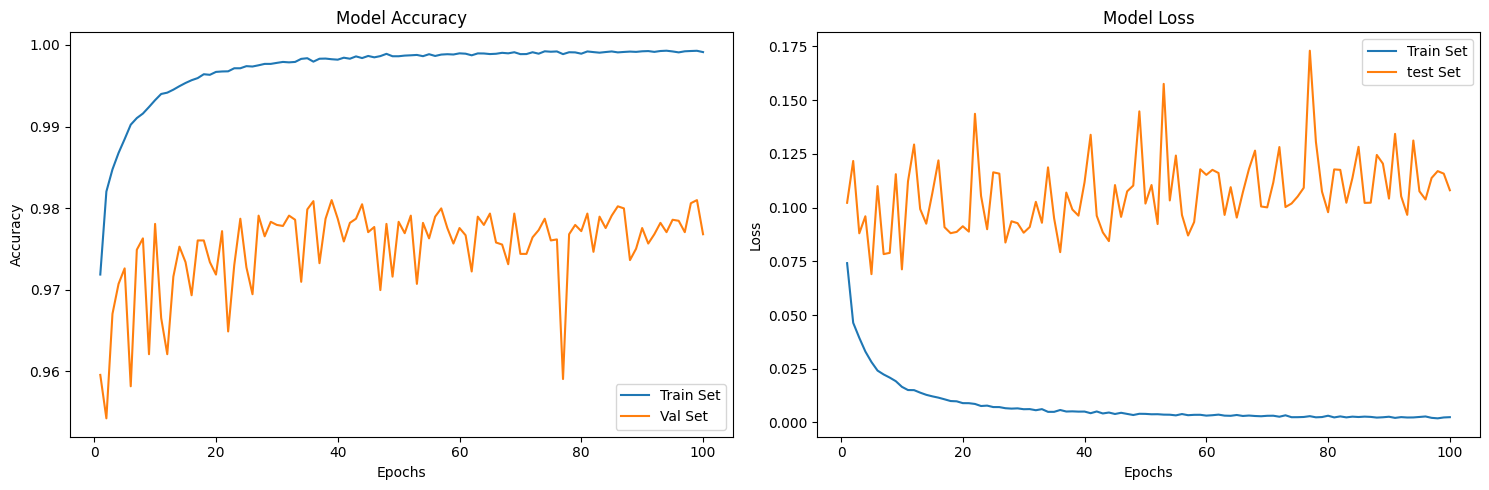

In [42]:
# plot model performance
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [43]:
# Define the ResNet model
    

from tensorflow.keras.applications import ResNet50

def create_resnet_model(input_shape, num_classes):
    base_model = ResNet50(include_top=False, weights=None, input_shape=input_shape)
    base_model.load_weights('F:/Mahabub/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
    base_model.trainable = False
    
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

  

In [44]:
# Create an instance of the ResNet model
resnet_model = create_resnet_model(input_shape=(224, 224, 3), num_classes=2)


In [45]:

resnet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
# Train the models
num_epochs = 100
history1 = resnet_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=num_epochs
)

Epoch 1/100
3501/3501 [==============================] - 133s 37ms/step - loss: 0.3929 - accuracy: 0.8195 - val_loss: 0.3891 - val_accuracy: 0.8302
Epoch 2/100
3501/3501 [==============================] - 130s 37ms/step - loss: 0.3542 - accuracy: 0.8426 - val_loss: 0.3932 - val_accuracy: 0.8285
Epoch 3/100
3501/3501 [==============================] - 130s 37ms/step - loss: 0.3477 - accuracy: 0.8473 - val_loss: 0.4101 - val_accuracy: 0.8226
Epoch 4/100
3501/3501 [==============================] - 131s 37ms/step - loss: 0.3467 - accuracy: 0.8496 - val_loss: 0.5128 - val_accuracy: 0.7918
Epoch 5/100
3501/3501 [==============================] - 130s 37ms/step - loss: 0.3440 - accuracy: 0.8502 - val_loss: 0.4104 - val_accuracy: 0.8263
Epoch 6/100
3501/3501 [==============================] - 131s 37ms/step - loss: 0.3446 - accuracy: 0.8501 - val_loss: 0.4198 - val_accuracy: 0.8278
Epoch 7/100
3501/3501 [==============================] - 131s 37ms/step - loss: 0.3437 - accuracy: 0.8507 - val_

In [47]:
test_loss3, test_acc3 = resnet_model.evaluate(validation_dataset, verbose=1)
print('Validation Accuracy: ', test_acc3)
print('Validation Loss: ', test_loss3)

247/247 [==============================] - 9s 35ms/step - loss: 0.4124 - accuracy: 0.8275
Validation Accuracy:  0.8275206089019775
Validation Loss:  0.41236624121665955


In [48]:
test_loss4, test_acc4 = resnet_model.evaluate(test_dataset, verbose=1)
print('Test Accuracy: ', test_acc4)
print('Test Loss: ', test_loss4)

341/341 [==============================] - 12s 35ms/step - loss: 0.6503 - accuracy: 0.7539
Test Accuracy:  0.7538743615150452
Test Loss:  0.6503365635871887


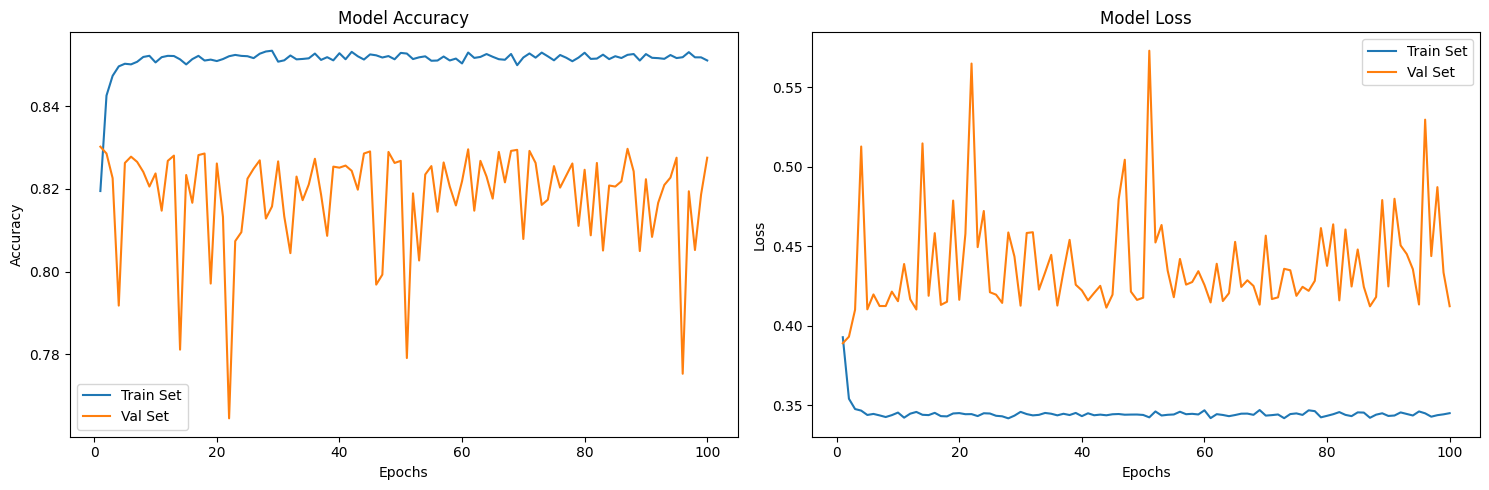

In [49]:
# plot model performance
train_acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs_range = range(1, len(history1.epoch) + 1)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc1, label='Train Set')
plt.plot(epochs_range, val_acc1, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss1, label='Train Set')
plt.plot(epochs_range, val_loss1, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()